# K-Nearest Neighbors Algorithm (Classification)

 1) Create a K-NN model from scratch 

 2) Use sklearn to implement K-NN 
 
 3) Use sklearn to implement K-NN; use GridSearchCV and RandomizedSearchCV to select hyper-parameters
 
 4) Use sklearn to implement K-NN and mlxtend to plot the desicion boundary

## 1) Create a K-NN model from scratch 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
df = pd.read_csv(url)

In [8]:
 df.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [5]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


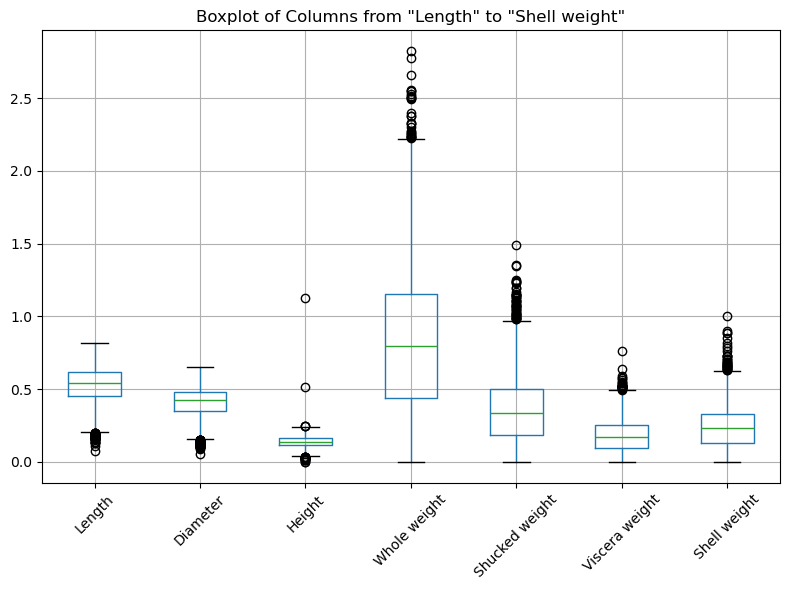

In [10]:
# Create a boxplot for all columns from 'Length' to 'Shell eight'
df.loc[:, 'Length':'Shell weight'].boxplot(figsize=(8, 6))
# Corrected title with matching quotes
plt.title('Boxplot of Columns from "Length" to "Shell weight"')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
# Initialize the LabelEncoder
le = LabelEncoder() 

# Fit and transform the "Sex" column
df["Sex"] = le.fit_transform(df["Sex"])

In [27]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,1.052682,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.822208,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [11]:
X = df[["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight"]].to_numpy()

y = df["Rings"].to_numpy()

---

**Remark**: In machine learning we fit the model to the **training data** and we choose optimal hyper-parameters using the **validation data**. Then with those choices of hyper-parameters, we fit the model again to the training data, and we evaluate and report model prformance on the **test data**. 

---

In [12]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [30]:
X_train.shape

(2505, 7)

In [31]:
X_valid.shape

(835, 7)

In [32]:
X_test.shape

(836, 7)

In [17]:
X_train[0]

array(['M', 0.395, 0.28, 0.08, 0.266, 0.0995, 0.066, 0.09], dtype=object)

In [13]:
# We define Euclidean distance function

def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between X_train[0] and X_train[1] is {distance(X_train[0], X_train[1])}")

The distance between X_train[0] and X_train[1] is 0.09659710140578756


In [15]:
# We define a function that will create a list of k nearest neighbors from the training data set to a given test point
# For each such neighbor, this list will store: features of that neighbor, its label, and its distance to the test point

def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):

    neighbors = []
    
    for p, l in zip(training_features, training_labels):
        d = distance(point, p)
        info = [p, l, d]
        neighbors.append(info)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [16]:
# Check the k_nearest_neighbors function for a test data point

k_nearest_neighbors(X_test[3], X_train, y_train, 7)

[[array([0.635 , 0.51  , 0.17  , 1.2235, 0.532 , 0.271 , 0.354 ]),
  9,
  0.014949916387726105],
 [array([0.65 , 0.495, 0.175, 1.227, 0.528, 0.258, 0.37 ]),
  11,
  0.024222923027578683],
 [array([0.625 , 0.495 , 0.175 , 1.2075, 0.531 , 0.281 , 0.3525]),
  11,
  0.03097983214931937],
 [array([0.635 , 0.515 , 0.165 , 1.229 , 0.5055, 0.2975, 0.3535]),
  10,
  0.035178118198675716],
 [array([0.625 , 0.485 , 0.165 , 1.2255, 0.5075, 0.296 , 0.36  ]),
  10,
  0.039080046059338264],
 [array([0.62  , 0.49  , 0.17  , 1.2105, 0.5185, 0.2555, 0.335 ]),
  13,
  0.04060788100849395],
 [array([0.63 , 0.49 , 0.155, 1.229, 0.535, 0.29 , 0.335]),
  11,
  0.041021335911937344]]

In [17]:
y_test[3]

10

In [18]:
# We write a function that makes prediction for both classification and regression

def knn_predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    labels = [x[1] for x in neighbors]
    
    if regression == False:
        return max(labels, key = labels.count)
    else:
        return sum(labels)/k

In [19]:
# Check this function

knn_predict(X_test[3], X_train, y_train, 7, regression = True)

10.714285714285714

In [16]:
def accuracy(test_features, 
             test_labels,
             training_features, 
             training_labels,
             k):
    
    correct = 0
    for point, label in zip(test_features, test_labels):
        correct += label == knn_predict(point, 
                                        training_features, 
                                        training_labels, 
                                        k)
    return correct/len(test_features)

In [17]:
# Check this function

accuracy(X_valid, y_valid, X_train, y_train, 15)

0.8

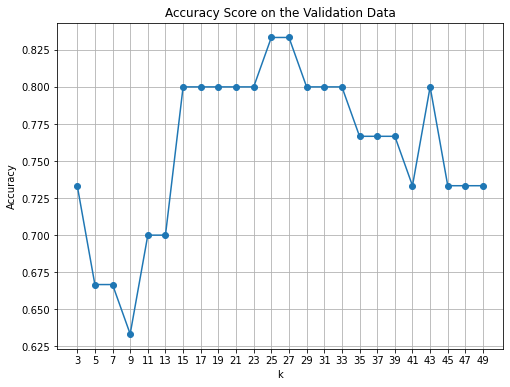

In [18]:
k_values = [k for k in range(3, 50, 2)]
accuracy_values = [accuracy(X_valid,
                            y_valid,
                            X_train,
                            y_train, k) for k in k_values]

plt.figure(figsize = (8, 6))

plt.plot(k_values, accuracy_values, marker = "o")
plt.title('Accuracy Score on the Validation Data')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid();

In [19]:
# We choose the optimal value for k from the above graph, 
# we fit the model again on the training data and 
# we report the error on the test data

accuracy(X_test, y_test, X_train, y_train, 25)

0.9

## 2) Use sklearn to implement K-NN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X = df[["sepal_length", "sepal_width"]]
y = df["species"]

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [ ]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_valid)
y_pred

In [ ]:
accuracy_score(y_valid, y_pred)

In [ ]:
cm = confusion_matrix(y_valid, y_pred)
cm

In [ ]:
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":15},
           xticklabels=['setosa', 'versicolor', 'virginica'],
           yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [ ]:
print(classification_report(y_valid, y_pred))

In [ ]:
k_values = []
acc_score = []

for k in range(1, 50, 2):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc_score.append(accuracy_score(y_valid, y_pred))
    k_values.append(k)


plt.figure(figsize = (8, 6))

plt.plot(k_values, acc_score, marker = "o")
plt.title("Accuracy Score on the Validation Data")
plt.xlabel("k")
plt.ylabel("accuracy score")
plt.xticks(k_values)
plt.grid();

In [ ]:
m = max(acc_score)
m

In [ ]:
k_values[acc_score.index(m)]

In [ ]:
model = KNeighborsClassifier(n_neighbors = 25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

## 3) Use GridSearchCV and RandomizedSearchCV to select hyper-parameters

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [ ]:
X = df[["sepal_length", "sepal_width"]]
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                            X_train, 
                            y_train, 
                            cv=5, # no shuffle, stratified for classifiers, default value 5
                            #cv=KFold(n_splits=5, shuffle=True), 
                            #cv=StratifiedKFold(n_splits=5, shuffle=True),
                            #cv=RepeatedKFold(n_splits=5, n_repeats=3),
                            scoring='accuracy')

cv_scores

In [ ]:
plt.plot(range(1, 6), cv_scores, marker='o')
plt.ylim(0, 1)
plt.ylabel('Accuracy score', fontsize=15)
plt.xlabel('Fold', fontsize=15)
plt.xticks(range(1,6))

print(np.round(cv_scores,2))
print('Average accuracy:', cv_scores.mean())
print('Accuracy standard deviation:', cv_scores.std());  

In [ ]:
gs = GridSearchCV(estimator = KNeighborsClassifier(),
                  param_grid = {"n_neighbors": range(1,51),
                                "weights": ['uniform', 'distance'],
                                "p": [1,2]},
                  cv=5)

gs.fit(X_train, y_train)

gs.cv_results_

In [ ]:
results = pd.DataFrame(gs.cv_results_)
results

In [ ]:
results[["param_n_neighbors", "param_weights", "param_p", "mean_test_score", "rank_test_score"]]

In [ ]:
gs.best_score_

In [ ]:
gs.best_params_

In [ ]:
y_pred = gs.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
rs = RandomizedSearchCV(estimator = KNeighborsClassifier(),
                        param_distributions = {"n_neighbors": range(1,51),
                                               "weights": ['uniform', 'distance'],
                                               "p": [1,2]},
                        cv=5,
                        n_iter=10)

rs.fit(X_train, y_train)

rs.best_score_

In [ ]:
rs.best_params_

In [ ]:
y_pred = rs.predict(X_test)
accuracy_score(y_test, y_pred)

##  4) Use sklearn to implement K-NN and mlxtend to plot the desicion boundary

In [ ]:
#pip install mlxtend

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
k=50                # try k=50
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

In [ ]:
#plot_decision_regions(X_train.to_numpy(), y_train, clf = model)
plot_decision_regions(X_test.to_numpy(), y_test, clf = model) # change to test data
plt.xlabel('sepal length')
plt.ylabel('sepal width')
#plt.title(f"Decision Regions using {k}-NN and the Test Data");